<h1>Import Necessary Libraries</h1>

In [1]:
import numpy as np # For numerical computation
import os # To list the directory/files present with provided path parameter
import shutil # To transfer the list of images into train and val folder
import re # For finding subset string pattern
import cv2 # for selective search algorithm
import matplotlib.pyplot as plt # For showing the image
import json # To store all images annotation contains BB and their labels into json format 

<h1>Explore Dataset</h1>

Let explore dataset directory which is provided by PASCAL VOC. (Homepage Link: http://host.robots.ox.ac.uk/pascal/VOC/ )

In this notebook, we are considering **VOC2005 Challenge** Dataset (link: http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1).

In [2]:
trainDir = 'TrainDataSet/VOCdevkit/VOC2006/'
testDir = 'TestDataSet/VOCdevkit/VOC2006/'

In [3]:
print('List of directory present in TrainDataset',os.listdir(trainDir))

List of directory present in TrainDataset ['Annotations', 'contrib.txt', 'ImageSets', 'PNGImages']


<h2>Description about dataset:</h2>

<img src='img/info.jpg'>

<h2>Inside Data</h2>

After observing all the directories and files (directory each of directories), the following are:
<h3> ImageSets folder </h3>

It contain list of text (which is label name) that created for train and val image. Inside the text, there is two columns: **imageName** and **their corresponding class label**. 

<p style='text-align: center'>These are list of files inside ImageSets</p>
<img src='img/Imageset1.JPG' >
<p style='text-align: center'>Each of text name is considered as <b>labelname with corresponding type of dataset (train/val)</b>.</p>

Now if we go and read two files which is appended with train: **bicycle_train** and **bus_train**

<img src='img/Imageset2.JPG' >

<p style='text-align: justify'>You can see, there are two columns which indicates <b>Imagename</b> and their corresponding <b>label value</b>. For example: Reading from <u>bicycle_train.text</u> file, in the above image, <b>000016 -1</b> indicating that for this <b>imagename 000016</b>, there is <b>no bicycle exist</b>. Similarily, you can read from <u>bus_train.text</u>, its same as it implies as for this <b>imagename 000016</b>, there is <b>no bus exist</b></p>

They create separate text files which contains list of image name whether these images belong to train data or valid data.

<img src='img/Imageset5.jpg' >

<h3> PNGImages folder </h3>

It contains list of images presents in it.

With the sample illustration above, let see with image name as **000016.png**

<img src='img/000016.png'>
<p style='text-align: center'>00016.png</p>

So, you see, there is **no bicycle and bus** present in it.

And we should expect that this images must be present in cat_train.txt, right? Let chek it out.

<img src='img/Imageset4.JPG' >

<p style='text-align: center'>Yes!! There is labelled as 1 in cat_train.txt.</p>.

<h3> Annotation folder </h3>

It contain about object location of an object in each image.
<img src='img/annotation1.jpg' >

Let open with same file name: 000016

<img src='img/annotation2.jpg' >

its descripted as
<ul>
    <li>Image FileName </li>
    <li>Image size </li>
    <li>Number of objects present with ground truth value</li>
    <li>Diagonal coordinates (i.e. bounding box) of ground object </li>
</ul>

<h1>Preprocess the data</h1>

<h2>Create two folder: train and val data</h2>
    
And copy the images into either train and val data as per mention in train.txt and val.txt

In [4]:
# Read the train.txt file
with open(trainDir+'ImageSets/train.txt','r') as f:
    c = f.read()
c

'000016\n000017\n000023\n000025\n000029\n000032\n000036\n000040\n000041\n000050\n000051\n000056\n000057\n000062\n000070\n000074\n000079\n000082\n000083\n000086\n000092\n000094\n000096\n000103\n000104\n000114\n000116\n000120\n000122\n000124\n000127\n000128\n000132\n000136\n000137\n000149\n000150\n000154\n000158\n000159\n000162\n000167\n000180\n000188\n000190\n000199\n000200\n000207\n000210\n000219\n000221\n000224\n000231\n000233\n000241\n000242\n000246\n000248\n000251\n000255\n000256\n000257\n000262\n000264\n000267\n000268\n000281\n000282\n000283\n000288\n000293\n000298\n000307\n000315\n000316\n000318\n000326\n000328\n000331\n000342\n000343\n000344\n000351\n000352\n000353\n000358\n000359\n000360\n000365\n000366\n000368\n000377\n000378\n000388\n000390\n000392\n000393\n000395\n000397\n000403\n000407\n000415\n000424\n000426\n000432\n000438\n000440\n000441\n000444\n000448\n000452\n000466\n000468\n000471\n000482\n000490\n000492\n000493\n000494\n000502\n000506\n000522\n000524\n000529\n000530\

It's seems it is separated by '\n' between each filename. Let separate it by '\n' to get the list of filename

In [5]:
# Separate by '\n'
c = c.split('\n')
# Print 10 elements of filenames
c[:10]

['000016',
 '000017',
 '000023',
 '000025',
 '000029',
 '000032',
 '000036',
 '000040',
 '000041',
 '000050']

In [6]:
# Just append each filename with train directory from PNGImages
for i in c[:10]:
    # If string is not empty
    if i:
        print(trainDir+'PNGImages/'+i+'.jpg')

TrainDataSet/VOCdevkit/VOC2006/PNGImages/000016.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000017.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000023.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000025.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000029.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000032.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000036.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000040.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000041.jpg
TrainDataSet/VOCdevkit/VOC2006/PNGImages/000050.jpg


In [7]:
# Move all images into separate folders: train and val 
def MovSepImage(train_imageDir, train_txtfile, imgDest):
    '''
    Separate ALL images into train and val images as per text mentioned.
    
    Parameters:
    train_imageDir: Source image Directory
    train_txtfile: Text filename which contain list of image name
    imgDest: Destination Image Directory
    '''
    with open(train_imageDir+train_txtfile) as f:
        c = f.read()
    c = c.split('\n')
    for i in c:
        # If string is not empty
        if i:
            # whether directory exist or not
            if imgDest not in os.listdir():
                os.makedirs(imgDest)

            # Copy this image and move to new directory called train
            shutil.copy(trainDir+'PNGImages/'+i+'.png', imgDest)
    
    print('Done!')

In [8]:
MovSepImage(trainDir+'ImageSets/', 'train.txt', 'train')

Done!


In [9]:
MovSepImage(trainDir+'ImageSets/', 'val.txt', 'val')

Done!


<h2>Store Bounding box value of each eimage and their corresponding label</h2>

We will store in `dict()` format

`
{
    ImageName1: [[x1,y1,x2,y2,object_label1],
                [x1,y1,x2,y2,object_label2],
                ...
                ]
    ImageName2: [[x1,y1,x2,y2,object_label1],
                [x1,y1,x2,y2,object_label2],
                ...
                ]
    ...
}`

In [10]:
# This is variable which contain only train iamges
train_img = 'train/'

for i in os.listdir(train_img): 
    print(i)
    with open(trainDir+'Annotations/'+i.split('.')[0]+'.txt') as f:
        lines = f.readlines()
    break

000016.png


In [11]:
lines[0]

'# PASCAL Annotation Version 1.00\n'

Observe **L** from below indicate line number for annotation text file.

<img src='img/annotation3.JPG' >

Since, python arrqay index **start with 0**. So, lines[0] is a line number 1 in text file.

<u>Observing</u> above to illurating how to fetch particular pattern

In Line number 6, Number of object present in it (i.e.3) which means there will be 3 object_label and their corresponding bounding box value, right?

Output should be like this: 

>  dict() has key and values pairs where key stored image name and values store all bounding box and their label present in image name in 2D matrix

`
{
    000016.png: [[85,114,452,332,PAScatTrunc],
                 [302,50,390,159,PAScatTrunc],
                 [135,47,262,202,PAScat]]
}
`

So, Line Number 6 will tell you number of object present and object label.
Bounding box start from line number 6 to pattern like line number as 15, 19, 23... (i.e. 6+9= 15, 15+4 = 19, 19+4 = 23, ...)

So, we will jump first time with 9 and then add 4 consequence to get bounding box value as per number of objects present in it.

<h3>Illustration of finding label name</h3>

In [12]:
print('Line Number 6 from text:\n',lines[5])
print('*'*50)
print('Split by \':\' \n',lines[5].split(':'))
print('Interested in second part. Move to that second index\n', lines[5].split(':')[1])
print('*'*50)
print('Split by \'(space)\' \n',lines[5].split(':')[1].split(' '))
print('Second index tell the number of object present. And start from 4 index to till number of object present in it')
print('*'*50)
num_obj = int(lines[5].split(':')[1].split(' ')[1])
for i in range(num_obj):
    print('Label Name:',lines[5].split(':')[1].split(' ')[i+3])

Line Number 6 from text:
 Objects with ground truth : 3 { "PAScatTrunc" "PAScatTrunc" "PAScat" }

**************************************************
Split by ':' 
 ['Objects with ground truth ', ' 3 { "PAScatTrunc" "PAScatTrunc" "PAScat" }\n']
Interested in second part. Move to that second index
  3 { "PAScatTrunc" "PAScatTrunc" "PAScat" }

**************************************************
Split by '(space)' 
 ['', '3', '{', '"PAScatTrunc"', '"PAScatTrunc"', '"PAScat"', '}\n']
Second index tell the number of object present. And start from 4 index to till number of object present in it
**************************************************
Label Name: "PAScatTrunc"
Label Name: "PAScatTrunc"
Label Name: "PAScat"


In [13]:
# Let try for another annotation text file to make sure everything is working alright
with open(trainDir+'Annotations/000023.txt') as f:
        lines = f.readlines()

In [14]:
print('Line Number 6 from text:\n',lines[5])
print('*'*50)
print('Split by \':\' \n',lines[5].split(':'))
print('Interested in second part. Move to that second index\n', lines[5].split(':')[1])
print('*'*50)
print('Split by \'(space)\' \n',lines[5].split(':')[1].split(' '))
print('Second index tell the number of object present. And start from 4 index to till number of object present in it')
print('*'*50)
num_obj = int(lines[5].split(':')[1].split(' ')[1])
for i in range(num_obj):
    print('Label Name:',lines[5].split(':')[1].split(' ')[i+3])

Line Number 6 from text:
 Objects with ground truth : 1 { "PASdogFrontalTrunc" }

**************************************************
Split by ':' 
 ['Objects with ground truth ', ' 1 { "PASdogFrontalTrunc" }\n']
Interested in second part. Move to that second index
  1 { "PASdogFrontalTrunc" }

**************************************************
Split by '(space)' 
 ['', '1', '{', '"PASdogFrontalTrunc"', '}\n']
Second index tell the number of object present. And start from 4 index to till number of object present in it
**************************************************
Label Name: "PASdogFrontalTrunc"


<h3>Rectify the label name</h3>

Its seems to working perfectly alright!

Now **one last things**, label name has been to refined. There are 10 labels (Check in Imagesets folder) follow as:
1. bicycle
2. bus
3. car
4. cat
5. cow
6. dog
7. horse
8. motorbike
9. person
10. sheep
11. background (explicitly added to make sure whether it is object or just plain)

In [15]:
label = ['bicycle','bus','car','cat','cow','dog','horse','motorbike','person','sheep', 'background']

In [16]:
num_obj = int(lines[5].split(':')[1].split(' ')[1])
for i in range(num_obj):
    for j in label:
        pat_mat = re.search(j,lines[5].split(':')[1].split(' ')[i+3])
        if pat_mat:
            print('Label Name',j)
            break

Label Name dog


<h3>Locating the bounding box value</h3>

In [17]:
# Just like line number starting from 15, 19, 23, ... (number of object label)
print('Line number 15:\n',lines[14])
print('*'*50)
print('Split by \':\'\n',lines[14].split(':'))
print('We need to go into second index as it contain bounding box value\n',lines[14].split(':')[1])
print('*'*50)
print('Remove all the special character\n',re.sub(r'[^a-zA-Z0-9]+',' ',lines[14].split(':')[1]))
print('Split by \'.\'\n', re.sub(r'[^a-zA-Z0-9]+',' ',lines[14].split(':')[1]).split(' '))

Line number 15:
 Bounding box for object 1 "PASdogFrontalTrunc" (Xmin, Ymin) - (Xmax, Ymax) : (158, 117) - (362, 375)

**************************************************
Split by ':'
 ['Bounding box for object 1 "PASdogFrontalTrunc" (Xmin, Ymin) - (Xmax, Ymax) ', ' (158, 117) - (362, 375)\n']
We need to go into second index as it contain bounding box value
  (158, 117) - (362, 375)

**************************************************
Remove all the special character
  158 117 362 375 
Split by '.'
 ['', '158', '117', '362', '375', '']


Now, if we have more than one object label, just add `4k` where **k** denotes **number of objects label**.

`re.sub(r'[^a-zA-Z0-9]+',' ',lines[14+4*k].split(':')[1]).split(' ')`

<p>when k=0 (basically means one object), lines[14] </p>

<p>when k=1 (means 2 object labels), lines[14+4*k] -> lines[14+4*1] = lines[18]</p>

> <strong>Kindly remember, array index start with 0, that why here it is illustrated as starting index as 0</strong>

<h3>Combined everything into one</h3>

In [18]:
def annot_label(train_img, train_dir):
    '''
    Annotate Image label with bounding box in Dictionary format
    
    Parameters:
    train_img: Train/Val Image Directory
    train_dir: Directory which contain Annotation folder
    
    Return:
    dict() format contain key as imageName and value as bounding box (x1,y1,x2,y2) and their object label
    '''
    
    annot_dict = dict()

    label = ['bicycle','bus','car','cat','cow','dog','horse','motorbike','person','sheep']
    
    # Iterate all image filename fr0m train image folder
    for i in os.listdir(train_img):

        # create variable for values in dict() (which is bounding box value and their object label)
        array2D = []

        # Read image file image from Annotation Folder which describe about bounding box
        with open(train_dir+'Annotations/'+i.split('.')[0]+'.txt') as f:

            # Store all the text files linewise
            lines = f.readlines()

            # Go to line number 5 and store the number of objects
            num_obj = int(lines[5].split(':')[1].split(' ')[1])

            # Go to bounding box value starting from line number 15.
            # (Kindly go through above description which is explained it line number pattern.)
            for j in range(num_obj):

                # Now iterate over label value to get the actual label value
                # as label in Annotation text file not defined very well
                for k in label:

                    # Find the pattern if any of the label present in substring in object_label in text file
                    # For example: PASdogFrontalTrunc  is labelled as dog
                    pat_mat = re.search(k,lines[5].split(':')[1].split(' ')[j+3])

                    # If any label pattern found, consider this as a label
                    if pat_mat:

                        # Now, go the bounding box value from line number pattern 15, 15+4, 15+4+4, ... (as number of objects)
                        # 15, 15+4, 15+4*2,....
                        bb_val = re.sub(r'[^a-zA-Z0-9]+',' ',lines[14+4*j].split(':')[1]).split(' ')
                        array2D.append([int(bb_val[1]),int(bb_val[2]),int(bb_val[3]),int(bb_val[4]),k])
                        break

            # Store in dict()
            annot_dict[i] = array2D
            
    return annot_dict

In [19]:
train_annotLabel = annot_label(train_img, trainDir)

In [20]:
# You can change the image name in train folder and cross verify the object label
train_annotLabel['000016.png']

[[85, 114, 452, 332, 'cat'],
 [302, 50, 390, 159, 'cat'],
 [135, 47, 262, 202, 'cat']]

<img src='img/000016.png'>
<p style='text-align: center'> Figure ImageFile: 000016.jpg</p>

In [21]:
val_img = 'val/'
val_annotLabel = annot_label(val_img, trainDir)

In [22]:
# You can change the image name in val folder and cross verify the object label
val_annotLabel['000263.png']

[[301, 118, 382, 375, 'person'],
 [93, 115, 175, 375, 'person'],
 [1, 2, 500, 362, 'bus']]

<img src='img/000263.png'>
<p style='text-align: center'> Figure ImageFile: 000256.jpg</p>

<h2>Plot images with ground truth</h2>

Let check it out the ground value bounding box after going through all of these.

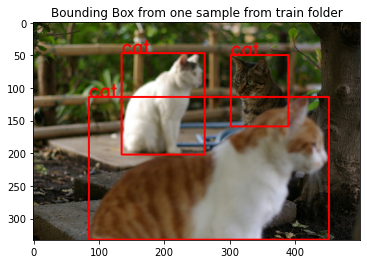

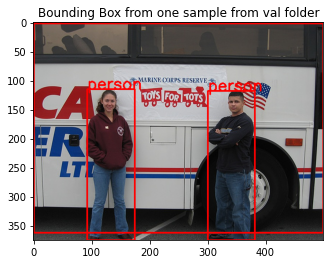

In [23]:
# Assign any one image name from train folder
imageName = '000016.png'

# Plot the images
plt.figure()
# Read the image using cv2
im1 = cv2.imread(train_img+imageName)
# By default cv2 read as BGR. So convert into RGB format channel
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
# Since there are multuiple object labels present, we will iterate
# through number of label present
for i in range(len(train_annotLabel[imageName])):
    # Fetch x1,y1,x2,y2,label from train_annotLabel variable
    # which have same imageName (i.e. '000016.png').
    x1,y1,x2,y2,label = train_annotLabel[imageName][i]
    # We got two coordinates, just plot the box.
    imBB = cv2.rectangle(im1, (x1,y1), (x2,y2), (255, 0, 0), 2)
    # Put the label outsided the bounding box
    cv2.putText(imBB, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    # If it containes more object, it will go back and getch the next object label
    # and their bounding box value/
    
plt.title('Bounding Box from one sample from train folder')
plt.imshow(im1)

# Same explaination aws above.
# Assign any one image from val folder
imageName = '000263.png'
plt.figure()
im1 = cv2.imread(val_img+imageName)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
for i in range(len(val_annotLabel[imageName])):
    x1,y1,x2,y2,label = val_annotLabel[imageName][i]
    imBB = cv2.rectangle(im1, (x1,y1), (x2,y2), (255, 0, 0), 2)
    cv2.putText(imBB, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
plt.title('Bounding Box from one sample from val folder')
plt.imshow(im1)

<h2> Save All progress into files</h2>

Keep all the variables into files so that we dont go through all these cells compile again.

In [24]:
# Create a file name callued 'train_annotLabel.json' in json format
with open('train_annotLabel.json','w') as f:
    json.dump(train_annotLabel, f)

In [25]:
# Similarily for val annotate label stored in json format
with open('val_annotLabel.json','w') as f:
    json.dump(val_annotLabel, f)

Next time how to read json files that was dumped

In [26]:
with open('train_annotLabel.json') as f:
    data = json.load(f)

In [27]:
data['000016.png']

[[85, 114, 452, 332, 'cat'],
 [302, 50, 390, 159, 'cat'],
 [135, 47, 262, 202, 'cat']]

Here we are done: **Checkpoint I.**

Till Now we done:
1. Separate all images into train and val folder
2. Create a dictionary where keys as imageName and their values is in 2D array which contain bounding box value and object label. (Same operation for val operation also)
3. Dump into json file. (Same Operation done for val images also)

<h1>Selective Search Algorithm</h1>

Now in the previous, we got images and their corresponding labels and bounding box.

In [1]:
import cv2 # for selective search algorithm
import matplotlib.pyplot as plt # For showing the image
import os # To get the list of files for particular folder
import json # To read json files which contain all images annotation contains BB and their labels
import tqdm # For displaying loading progress bar
import numpy as np # For storing train data and label

In [2]:
trainDir = 'train/'
valDir = 'val/'

In [3]:
with open('train_annotLabel.json') as f:
    train_annotLabel = json.load(f)
    
with open('val_annotLabel.json') as f:
    val_annotLabel = json.load(f)

In [4]:
train_annotLabel['000016.png']

[[85, 114, 452, 332, 'cat'],
 [302, 50, 390, 159, 'cat'],
 [135, 47, 262, 202, 'cat']]

<h2>Notice!</h2>

Before going ahead the algorith, I've noticed that those image whose aspect ratio is greater than 2.2 will throw the error by SelectiveSearch Allgorithm provided by OpenCV.

So, we need to resize those images whose aspect ratio is greater than 2.2. Since we are changing the size, their ground truth coordination value has to be changes.

(Run One Time Only)

**Remember! DO also on testing stage also.**

In [6]:
# For training image

for i in os.listdir(trainDir):
    # Read Image
    img = cv2.imread(trainDir+i)
    # Store height and width of the image
    h_img, w_img = img.shape[0], img.shape[1]
    # Just make sure that aspect ratio should be less than 2.2
    # If height is greater than width and their aspect ratio is greater than 2.2
    # Just take the half of greater one (i.e height/2) and also half the y coordinates.
    if (h_img > w_img) and (h_img/w_img) > 2.2:
        img = cv2.resize(img, (w_img, h_img//2))
        for j in range(len(train_annotLabel[i])):
            # Fetch BB and label
            x1,y1,x2,y2,label = train_annotLabel[i][j]
            # Update value of coordinates
            y1, y2 = y1//2, y2//2
            # update annotation after updating coordinates
            train_annotLabel[i][j] = [x1,y1,x2,y2,label]
            
    # Similarly same if width is greater than height and aspect ratio is greater than 2.2
    # Just take he half of the width and also half the x coordinates.
    if (w_img > h_img) and (w_img/h_img) > 2.2:
        img = cv2.resize(img, (w_img//2, h_img))
        for j in range(len(train_annotLabel[i])):
            # Fetch BB and label
            x1,y1,x2,y2,label = train_annotLabel[i][j]
            # Update value of coordinates
            x1, x2 = x1//2, x2//2
            # update annotation after updating coordinates
            train_annotLabel[i][j] = [x1,y1,x2,y2,label]
    # Overwrite images into same directory 'train'
    cv2.imwrite(trainDir+i, img)
    
# For val image    
for i in os.listdir(valDir):
    # Read Image
    img = cv2.imread(valDir+i)
    # Store height and width of the image
    h_img, w_img = img.shape[0], img.shape[1]
    # Just make sure that aspect ratio should be less than 2.2
    # If height is greater than width and their aspect ratio is greater than 2.2
    # Just take the half of greater one (i.e height/2) and also half the y coordinates.
    if (h_img > w_img) and (h_img/w_img) > 2.2:
        img = cv2.resize(img, (w_img, h_img//2))
        for j in range(len(val_annotLabel[i])):
            # Fetch BB and label
            x1,y1,x2,y2,label = val_annotLabel[i][j]
            # Update value of coordinates
            y1, y2 = y1//2, y2//2
            # update annotation after updating coordinates
            val_annotLabel[i][j] = [x1,y1,x2,y2,label]
            
    # Similarly same if width is greater than height and aspect ratio is greater than 2.2
    # Just take he half of the width and also half the x coordinates.
    if (w_img > h_img) and (w_img/h_img) > 2.2:
        img = cv2.resize(img, (w_img//2, h_img))
        for j in range(len(val_annotLabel[i])):
            # Fetch BB and label
            x1,y1,x2,y2,label = val_annotLabel[i][j]
            # Update value of coordinates
            x1, x2 = x1//2, x2//2
            # update annotation after updating coordinates
            val_annotLabel[i][j] = [x1,y1,x2,y2,label]
    # Overwrite images into same directory 'val'
    cv2.imwrite(valDir+i, img)

# Update json file of both train and val annotation BB
with open('train_annotLabel.json','w') as f:
    json.dump(train_annotLabel, f)
    
with open('val_annotLabel.json','w') as f:
    json.dump(val_annotLabel, f)

<h2>Algorithm</h2>

In [4]:
img = cv2.imread(trainDir+'000016.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create the instance of Selective Search Algorithm
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# Select the base image you want to perform selective search algorithm
ss.setBaseImage(img)
# There is two ways to proceed in Selective Search.
# 1. Switch to fast but low recall Selective Search method
ss.switchToSelectiveSearchFast()
# 2. Switch to high recall but slow Selective Search method
# ss.switchToSelectiveSearchQuality()
# Run algorithm on input image
result_ss = ss.process()

In [5]:
result_ss.shape

(1272, 4)

It means that there are 1276 bounding boxes generated. And each bounding box consist of 4 coordinates: (x1,y1) and (w,h).
i.e. (x2,y2) = (x1+w,y1+h)

In [6]:
# Create copy of input image so that we don't need to read an image ovver again and again
img_dup = img.copy()

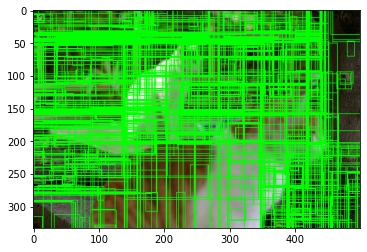

In [7]:
# Iterate over all number of bounding box
for i in range(result_ss.shape[0]):
    # Fetch each bounding box sample values
    x1,y1,w,h = result_ss[i]
    # We got four coordinates, just plot the box.
    cv2.rectangle(img, (x1,y1), (x1+w,y1+h), (0, 255, 0), 1)
plt.imshow(img)

Too much fuzzyy, let reduce number of bounding box to get good views.

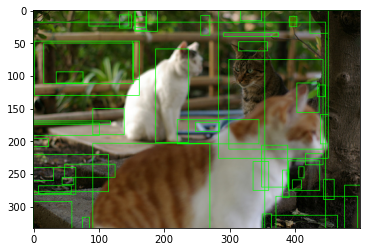

In [8]:
# Number of bounding box you need
num_BB = 50
# Assign restore image (which made a copy of an image)
img = img_dup

# Iterate over all number of bounding box
for i in range(result_ss.shape[0]):
    if i < num_BB:
        # Fetch each bounding box sample values
        x1,y1,w,h = result_ss[i]
        # We got four coordinates, just plot the box.
        cv2.rectangle(img, (x1,y1), (x1+w,y1+h), (0, 255, 0), 1)
plt.imshow(img)

In [4]:
def SelectiveSearch(imgDir, ss_fast=True):
    '''
    Perform Selective Search Algorithm
    
    Parameter:
    imgDir: Enter the image directory
    ss_fast: Select the approach of Selective Search Approach: True for Fast or False for Quality
    
    Return:
    Return list of all bounding boxex (i.e. shape of [Number of BB, 4])
    where '4' value indicate as (x,y,w,h)
    '''
    img = cv2.imread(imgDir)
    
    # cv2 by default read as BGR channel. Convert into RGB channel
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create the instance of Selective Search Algorithm
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    
    # Select the base image you want to perform selective search algorithm
    ss.setBaseImage(img)
    
    # There is two ways to proceed in Selective Search.
    # 1. Switch to fast but low recall Selective Search method
    if ss_fast:
        ss.switchToSelectiveSearchFast()
    # 2. Switch to high recall but slow Selective Search method
    else:
        ss.switchToSelectiveSearchQuality()
        
    # Run algorithm on input image
    result_ss = ss.process()
    
    return result_ss

<h2>IOU</h2>

In [3]:
def get_IOU(bb1,bb2):
    '''
    Calculate IOU of two bounding box
    
    Parameters:
    bb1: First bounding box in dict() format which contain 4 coordinates with labelled as 'x1','y1','x2','y2'
    bb2: Second bounding box in dict() format which contain 4 coordinates with labelled as 'x1','y1','x2','y2'
    
    Return:
    IOU value
    '''
    # Make sure in both Bounding boxes coordinates are valid
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    
    # Finding intersection
    x_left = max(bb1['x1'],bb2['x1'])
    y_bottom = max(bb1['y1'],bb2['y1'])
    x_right = min(bb1['x2'],bb2['x2'])
    y_top = min(bb1['y2'],bb2['y2'])
    
    # Checking whether there is any intersection avaiable
    # If not, return area of intersection as 0.
    if (x_left > x_right) or (y_bottom > y_top):
        return 0.0
    # Otheriwise
    area_intersect = (x_right - x_left) * (y_top - y_bottom)
    
    # To bring into percentage, calculate area of each bounding box
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    # p(AUB) = p(A) + p(B) - p(A,B)
    total_area = bb1_area + bb2_area - area_intersect
    # Finally in percentage
    iou = area_intersect / total_area
    
    # Make sure, IOU values within 0 to 1
    assert iou >= 0.0
    assert iou <= 1.0
    
    return iou

Let take one image as a example (which exceed aspect ratio greater than 2.2) and get the best IOU and BB values

In [11]:
# This image has a width = 500 and height: 189.
# Since w > h, so compute w/h which is greater than 2.2
# So, we updated the coordinate in annotLael.
# Let check it out whether it works or not.
imgName = '001091.png'

max_ = 0

for i in range(len(train_annotLabel[imgName])):
    img = cv2.imread(trainDir+imgName)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x1,y1,x2,y2,label = train_annotLabel[imgName][i]
    gt_coord = {'x1': x1, 'y1':y1, 'x2': x2, 'y2': y2}
    
    img_ssBB = SelectiveSearch(trainDir+imgName)
    for j in range(img_ssBB.shape[0]):
        x1,y1,w,h = img_ssBB[j]
        x2,y2 = x1+w, y1+h
        pred_coord = {'x1': x1, 'y1':y1, 'x2': x2, 'y2': y2}
        iou_val = get_IOU(gt_coord, pred_coord)
        if max_ < iou_val:
            max_ = iou_val
            best_iou_coord = pred_coord

In [12]:
print('Maimum IOU Score abd BB value', max_,best_iou_coord)

Maimum IOU Score abd BB value 0.9322249016372636 {'x1': 126, 'y1': 55, 'x2': 191, 'y2': 171}


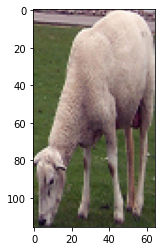

In [13]:
# Let crop and select those BB value coordinate we got the best one
# plt.imshow(img[47:200, 139:261])
plt.imshow(img[55:171, 126:191])

# It seems that by convential cv2 read as
# img[y1:y2, x1:x2]

Let visualize by looking in an image and see the ground truth and preddict BB

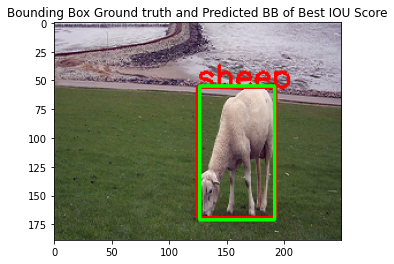

In [14]:
plt.figure()

for i in range(len(train_annotLabel[imgName])):
    x1,y1,x2,y2,label = train_annotLabel[imgName][i]
    imBB = cv2.rectangle(img, (x1,y1), (x2,y2), (255, 0, 0), 2)
    cv2.putText(imBB, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

cv2.rectangle(imBB, (best_iou_coord['x1'], best_iou_coord['y1']), (best_iou_coord['x2'], best_iou_coord['y2']), \
             (0, 255, 0), 2)
plt.title('Bounding Box Ground truth and Predicted BB of Best IOU Score')
plt.imshow(img)

By observation, we found the best IOU score between ground truth and predict BB (by selective search).

.:. Red color: Ground truth BB , Green color: Predicted BB by Selective Search

Now, there are multiple objects in an image, so we need to **compare each BB from selective search** to **every object in an image** and choose whether they belong any partiular object with greater 70% of IOU or not. Otherwise set as background

In [15]:
# Assign label names as index value
label = ['bicycle','bus','car','cat','cow','dog','horse','motorbike','person','sheep','background']
label_dict = dict()

for i,j in enumerate(label):
    label_dict[j] = i
label_dict

{'bicycle': 0,
 'bus': 1,
 'car': 2,
 'cat': 3,
 'cow': 4,
 'dog': 5,
 'horse': 6,
 'motorbike': 7,
 'person': 8,
 'sheep': 9,
 'background': 10}

<h2>ROI using Selective Search</h2>

1. Create the ROI using Selective Search and get Bounding box whose IOU is greater than 70% and less than 30%.
2. Store all the list of the images only ROI (crop ROI and resize into same input for all) and their corresponding labels.
3. We are storing regional Proposal BB `P` and their ground truth BB `G`. This will be used when we do bounding box regression.

Positive sample: {All labels except background}
Negative Sample: background only

In [16]:
train_X = []
train_y = []
P = []
G = []

# Iterate over all images present in train folder
for i in tqdm.tqdm_notebook(os.listdir(trainDir)):
    # Read image
    img = cv2.imread(trainDir+i)
    # Number of region selected
    num_reg = 0
    # Counter for positive samples (which contain only object)
    pos_sample = 0
    # Counter for negative samples (which contain background)
    neg_sample = 0
    
    # cv2 by default read as BGR channel. Convert into RGB channel
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get the BB Using Selective Search Algorithm
    img_ssBB = SelectiveSearch(trainDir+i)
    
    # Iterate over all sample BB which processed using Selective Search Algorithm
    for j in range(img_ssBB.shape[0]):
        # If number of region exceed 2000, terminate this loop
        # And proceed for next image
        if num_reg > 2000:
            break
            
        # Fetch bounding box coordinate
        x1,y1,w,h = img_ssBB[j]
        x2,y2 = x1+w, y1+h
        pred_coord = {'x1': x1, 'y1':y1, 'x2': x2, 'y2': y2}
        
        # Compare with all objects present in original image
        for k in range(len(train_annotLabel[i])):
            # Fetch ground truth bounding box coordinate
            g_x1,g_y1,g_x2,g_y2,g_label = train_annotLabel[i][k]
            gt_coord = {'x1': g_x1, 'y1':g_y1, 'x2': g_x2, 'y2': g_y2}
            # Get IOU score between ground truth and predicted BB
            iou_score = get_IOU(gt_coord, pred_coord)
            # Just to balance it, we made to have 5 number of positive sample
            if iou_score > 0.80 and pos_sample < 5:
                # Crop the image
                tr_img = img[y1:y2, x1:x2]
                # Resize the image into 227x227
                tr_resize = cv2.resize(tr_img, (227,227), cv2.INTER_AREA)
                tr_resize = tr_resize.astype('float32')
                tr_resize = tr_resize/255
                # Add to train_X list as well as their corresponding label
                train_X.append(tr_resize)
                train_y.append(label_dict[g_label])
                # Predicted BB and Ground truth BB
                P.append([pred_coord['x1'],pred_coord['y1'],pred_coord['x2'],pred_coord['y2']])
                G.append([gt_coord['x1'],gt_coord['y1'],gt_coord['x2'],gt_coord['y2']])
                pos_sample += 1
            # Just to balance it, we made to have 5 number of negative sample
            elif iou_score < 0.30 and neg_sample < 5:
                # Crop the image
                tr_img = img[y1:y2, x1:x2]
                # Resize the image into 227x227
                tr_resize = cv2.resize(tr_img, (227,227), cv2.INTER_AREA)
                # Add to train_X list as well as their corresponding label
                tr_resize = tr_resize.astype('float32')
                tr_resize = tr_resize/255
                train_X.append(tr_resize)
                train_y.append(label_dict['background'])
                # Predicted BB and Ground Truth BB set to zero Because
                # we are not interested to detect background.
                P.append([0,0,0,0])
                G.append([0,0,0,0])
                neg_sample += 1
            else:
                # If by chance both we got 10 positive sample as well as negative sample
                # No need to go further to select next region. Terminate here and
                # Move on to the next region
                if pos_sample > 5 and neg_sample > 5:
                    break
                # If one of the has to be filled, carrying on.
                else:
                    continue

C:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [17]:
np.array(train_X).shape

(10838, 227, 227, 3)

In [18]:
len(train_y)

10838

In [19]:
len(P), len(G)

(10838, 10838)

<h2>Save all training ROI images and their corresponding labels</h2>

In [20]:
import gc

In [21]:
P = np.array(P)
G = np.array(G)

np.save('P',P)
np.save('G',G)

del P, G
gc.collect()

104

In [22]:
train_y = np.array(train_y)
np.save('train_y',train_y)

del train_y
gc.collect()

20

In [23]:
train_X = np.array(train_X)
np.save('train_X',train_X)

del train_X
print('Done Saving')
gc.collect()

Done Saving


20

**Checkpoint II**

1. We have reduce some of the images which exceed aspect ratio greater than 2.2 and also updated annoted BB value also. So, we got updated train and val images as well as annotLabel.json files
2. We perform Selective Search Algorithm in all train images and crop the image whose IOU is greater than 70% of actual ground truth value.
3. We stored all list of images in train_X.npy as well as label train_y.npy

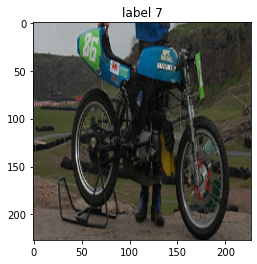

In [12]:
# Try display some images by changing i from 0 to 10838 (number of images present in train_X) with label index
i = 12112
plt.title('label '+str(train_y[i]))
plt.imshow(train_X[i])

<h1>Training Architecture and Phase</h1>

In [1]:
import numpy as np # To load the saved train_X and train_y
import tensorflow as tf # For Deep learning framework
import os # To list of images for val

<h1>Alexnet Architecture</h1>
<p>Image taken from https://www.learnopencv.com/understanding-alexnet/ </p>

<img src='img/AlexNet_Arch.png' >

<p><strong> Just minor changes, instead of 1000 classes in output layer, we set as per our number of classes (i.e. 10 classes)</strong></p>

In [2]:
def CNN5FC2(num_classes=10, input_shape=(227,227,3)):
    
    input_layer = tf.keras.layers.Input(shape=input_shape)
    conv1 = tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(input_layer)
    maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv1)
    conv2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu')(maxpool1)
    maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv2)
    conv3 = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')(maxpool2)
    conv4 = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')(conv3)
    conv5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(conv4)
    maxpool3 = maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv5)
    flat = tf.keras.layers.Flatten()(maxpool3)
    fc1 = tf.keras.layers.Dense(units=4096, activation='relu')(flat)
    fc2 = tf.keras.layers.Dense(units=4096, activation='relu')(fc1)
    output_layer = tf.keras.layers.Dense(units=num_classes, activation='softmax')(fc2)
    
    return input_layer, output_layer

In [3]:
# Load the train_X and train_y we just preprocessed
train_X = np.load('train_X.npy')
train_y = np.load('train_y.npy')
train_X.shape, train_y.shape

((10838, 227, 227, 3), (10838,))

In [4]:
# Convert label into OneHot Encoding (for Categorical)
n_classes = len(np.unique(train_y))
train_y = tf.keras.utils.to_categorical(train_y, num_classes=n_classes)

In [5]:
# Instance of AlexNet Model
input_layer, output_layer = CNN5FC2(num_classes = n_classes)
alexnet_model = tf.keras.models.Model(input_layer, output_layer)

In [6]:
# Show the layers and their outpur shape and number of trainable parameters
alexnet_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       132748

In [7]:
# Defiine Loss, Optimization and Metrics
opt_obj = tf.keras.optimizers.SGD(lr=0.001)
loss_obj = tf.keras.losses.CategoricalCrossentropy()
alexnet_model.compile(loss=loss_obj, optimizer=opt_obj, metrics=['accuracy'])

In [8]:
# Batch size for training
BATCH_SIZE = 16

Now, we are going to train the AlexNet Model. The purpose is that we want to have 2nd last layer (which is FC2) which contain 4096 features. So, once we trained the network, we can pass the train and val data to get 4096.

**Remember, we are not here yet for object detection. We want to find 4096 features for each image. And DL has shown the promising about feature extraction from each image.**

In [9]:
alexnet_model.fit(train_X, train_y, batch_size=BATCH_SIZE, epochs=10)

Train on 10838 samples
Epoch 1/10
10838/10838 [==============================] - 44s 4ms/sample - loss: 1.7186 - accuracy: 0.5845
Epoch 2/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.4214 - accuracy: 0.5996
Epoch 3/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.2536 - accuracy: 0.6212
Epoch 4/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.1682 - accuracy: 0.6345
Epoch 5/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.1217 - accuracy: 0.6441
Epoch 6/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.0938 - accuracy: 0.6484
Epoch 7/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.0677 - accuracy: 0.6557s - los
Epoch 8/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.0454 - accuracy: 0.6634
Epoch 9/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 1.0207 - accuracy: 0.6721
Epoch 1

In [10]:
alexnet_model.fit(train_X, train_y, batch_size=BATCH_SIZE, epochs=10)

Train on 10838 samples
Epoch 1/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.9732 - accuracy: 0.6904
Epoch 2/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.9560 - accuracy: 0.6931s - l
Epoch 3/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.9370 - accuracy: 0.6996
Epoch 4/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.9167 - accuracy: 0.7082
Epoch 5/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.8949 - accuracy: 0.7142
Epoch 6/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.8758 - accuracy: 0.7230
Epoch 7/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.8545 - accuracy: 0.7256
Epoch 8/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.8339 - accuracy: 0.7350
Epoch 9/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.8091 - accuracy: 0.7432ETA: 0s - 

In [11]:
alexnet_model.fit(train_X, train_y, batch_size=BATCH_SIZE, epochs=10)

Train on 10838 samples
Epoch 1/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.7575 - accuracy: 0.7595
Epoch 2/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.7329 - accuracy: 0.7645
Epoch 3/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.7086 - accuracy: 0.7753
Epoch 4/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.6782 - accuracy: 0.7841s - loss: 0
Epoch 5/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.6472 - accuracy: 0.7948s - loss: 0.645
Epoch 6/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.6186 - accuracy: 0.8013
Epoch 7/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.5819 - accuracy: 0.8135s - l
Epoch 8/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.5516 - accuracy: 0.8242
Epoch 9/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.5212 - 

In [12]:
alexnet_model.fit(train_X, train_y, batch_size=BATCH_SIZE, epochs=10)

Train on 10838 samples
Epoch 1/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.4423 - accuracy: 0.8595
Epoch 2/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.4052 - accuracy: 0.8736
Epoch 3/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.3676 - accuracy: 0.8871s - loss: 0.3665 - accura
Epoch 4/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.3369 - accuracy: 0.8946
Epoch 5/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.2975 - accuracy: 0.9081
Epoch 6/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.2742 - accuracy: 0.9196s - loss: 0.2739 - accuracy: 0.
Epoch 7/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.2405 - accuracy: 0.9277
Epoch 8/10
10838/10838 [==============================] - 40s 4ms/sample - loss: 0.2023 - accuracy: 0.9400
Epoch 9/10
10838/10838 [==============================] - 40s 4ms

In [13]:
# store architecture into json format
arch_json = alexnet_model.to_json()

In [14]:
# write and save architecture is json file
with open('alexnet_arch.json','w') as f:
    f.write(arch_json)

In [15]:
# save the weights only.
alexnet_model.save_weights('alexnet_weights.hdf5')

<h1> Feature Extraction </h1>

Now,We are going to feature extract from the second last layer which have 4096 units (from trained Alexnet)

In [1]:
import tensorflow as tf # For DL framework
import numpy as np # For saving variables into npy format
import cv2 # To operate on images and perform selective search algorithm
import json # To read/write json file
import tqdm # To display the progress bar
import os # To get the list of files for particular folder

In [2]:
# Load Architecture and weights
json_file = open('alexnet_arch.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("alexnet_weights.hdf5")

In [3]:
# Create another instantiate for removing last layer.
model = tf.keras.models.Model(loaded_model.input,loaded_model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       132748

In [4]:
# Load Train images performed ROI using SelectiveSearchAlgorithm
train_X = np.load('train_X.npy')

In [5]:
import tqdm # To Display the progress bar

# Find 4096 image feature extraction from pretrained Alexnet for each image
train_feat = []
for i in tqdm.tqdm_notebook(range(train_X.shape[0])):
    train_feat.append(list(model.predict(np.expand_dims(train_X[i], axis=0))[0]))

C:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [6]:
del train_X
# Store the profress of 4096 feature extracted image
train_feat = np.array(train_feat)
np.save('train_X_feat',train_feat)

In [7]:
# Display some top value
print(train_feat[:10])

[[2.0644286  0.         1.3766023  ... 1.331283   0.3779589  0.        ]
 [2.0644286  0.         1.3766023  ... 1.331283   0.3779589  0.        ]
 [2.0644286  0.         1.3766023  ... 1.331283   0.3779589  0.        ]
 ...
 [2.5206459  0.         0.7407776  ... 1.8021966  0.         0.53547543]
 [2.9217916  0.         0.8671905  ... 1.8351811  0.         0.3917648 ]
 [2.3756118  0.         0.7365738  ... 1.8417557  0.         0.48135987]]


**Similarily perform for val data**

In [1]:
import numpy as np # To load/save the variable in .npy format
import tensorflow as tf # To load the Alexnet architecture and predict 4096 features 
import json # To read the annotation label of val
import cv2 # To perform SelectiveSearchAlgorithm for val images
import os # To get the list of images present in val folder
import tqdm # To display the progress bar

1. Don't worry about this below stuff. This is exactly same as we have done in training image. Just go to cell under the section ```ROI using Selective Search```
2. Please make sure compile the cells which each contain two functions: ```SelectiveSearchAlgorithm()``` and ```get_IOU()```

In [5]:
valDir = 'val/'
with open('val_annotLabel.json') as f:
    val_annotLabel = json.load(f)

val_X = []
val_y = []
P_val = []
G_val = []

# Assign label names as index value
label = ['bicycle','bus','car','cat','cow','dog','horse','motorbike','person','sheep','background']
label_dict = dict()

for i,j in enumerate(label):
    label_dict[j] = i

# Iterate over all images present in val folder
for i in tqdm.tqdm_notebook(os.listdir(valDir)):
    # Read image
    img = cv2.imread(valDir+i)
    # Number of region selected
    num_reg = 0
    # Counter for positive samples (which contain only object)
    pos_sample = 0
    # Counter for negative samples (which contain background)
    neg_sample = 0
    
    # cv2 by default read as BGR channel. Convert into RGB channel
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get the BB Using Selective Search Algorithm
    img_ssBB = SelectiveSearch(valDir+i)
    
    # Iterate over all sample BB which processed using Selective Search Algorithm
    for j in range(img_ssBB.shape[0]):
        # If number of region exceed 2000, terminate this loop
        # And proceed for next image
        if num_reg > 2000:
            break
            
        # Fetch bounding box coordinate
        x1,y1,w,h = img_ssBB[j]
        x2,y2 = x1+w, y1+h
        pred_coord = {'x1': x1, 'y1':y1, 'x2': x2, 'y2': y2}
        
        # Compare with all objects present in original image
        for k in range(len(val_annotLabel[i])):
            # Fetch ground truth bounding box coordinate
            g_x1,g_y1,g_x2,g_y2,g_label = val_annotLabel[i][k]
            gt_coord = {'x1': g_x1, 'y1':g_y1, 'x2': g_x2, 'y2': g_y2}
            # Get IOU score between ground truth and predicted BB
            iou_score = get_IOU(gt_coord, pred_coord)
            # Just to balance it, we made to have 5 number of positive sample
            if iou_score > 0.80 and pos_sample < 5:
                # Crop the image
                val_img = img[y1:y2, x1:x2]
                # Resize the image into 227x227
                val_resize = cv2.resize(val_img, (227,227), cv2.INTER_AREA)
                val_resize = val_resize.astype('float32')
                val_resize = val_resize/255
                # Add to train_X list as well as their corresponding label
                val_X.append(val_resize)
                val_y.append(label_dict[g_label])
                P_val.append([pred_coord['x1'],pred_coord['y1'],pred_coord['x2'],pred_coord['y2']])
                G_val.append([gt_coord['x1'],gt_coord['y1'],gt_coord['x2'],gt_coord['y2']])
                pos_sample += 1
            # Just to balance it, we made to have 5 number of negative sample
            elif iou_score < 0.30 and neg_sample < 5:
                # Crop the image
                val_img = img[y1:y2, x1:x2]
                # Resize the image into 227x227
                val_resize = cv2.resize(val_img, (227,227), cv2.INTER_AREA)
                # Add to train_X list as well as their corresponding label
                val_resize = val_resize.astype('float32')
                val_resize = val_resize/255
                val_X.append(val_resize)
                val_y.append(label_dict['background'])
                P_val.append([0,0,0,0])
                G_val.append([0,0,0,0])
                neg_sample += 1
            else:
                # If by chance both we got 10 positive sample as well as negative sample
                # No need to go further to select next region. Terminate here and
                # Move on to the next region
                if pos_sample > 5 and neg_sample > 5:
                    break
                # If one of the has to be filled, carrying on.
                else:
                    continue

C:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [6]:
import gc # to collect garbage after applying del operation to free up the space in RAM

In [7]:
# Store 'P' and 'G' value which will used in Predicting BB regression problem
P_val = np.array(P_val)
G_val = np.array(G_val)
np.save('P_val',P_val)
np.save('G_val',G_val)

del P_val, G_val
gc.collect() # Collect garbage when del operation perform in previous line to free up the RAM

44

In [8]:
# Convert into nunpy array
val_y = np.array(val_y)

# Save val label into npy format
np.save('val_y',val_y)
del val_y
gc.collect()

20

In [9]:
# Convert into numpy array
val_X = np.array(val_X)

# Save val images performed ROI using SelectiveSearchAlgorithm into npy format
np.save('val_X',val_X)

Kindly restart the kernel to free up the space.

And make sure compile first 3 cells under the ```Feature Extraction``` section.

In [4]:
import tqdm # To display the progress bar

# Load the val images performed ROI using SelectiveSearchAlgorithm
val_X = np.load('val_X.npy')

# Find 4096 image feature extraction from pretrained Alexnet for each image
val_feat = []
for i in tqdm.tqdm_notebook(range(val_X.shape[0])):
    val_feat.append(list(model.predict(np.expand_dims(val_X[i], axis=0))[0]))

C:\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [5]:
del val_X

# Store the 4096 feature extraction value into npy
val_feat = np.array(val_feat)
np.save('val_X_feat',val_feat)

In [6]:
# Display some top value
print(val_feat[:10])

[[0.8762383  0.         0.         ... 0.         1.7803026  0.        ]
 [0.8762383  0.         0.         ... 0.         1.7803026  0.        ]
 [0.8762383  0.         0.         ... 0.         1.7803026  0.        ]
 ...
 [1.49502    0.         0.3817966  ... 0.42603645 0.         0.        ]
 [3.1071346  0.         1.2334569  ... 2.027348   0.         0.        ]
 [3.1114233  0.         1.2108529  ... 2.0256095  0.         0.        ]]


<h1> SVM and BB </h1>

Now, we have extracted and stored 4096 features of both train and val images. Let get start training for Object detection.

There will be two things to be see: ```Classify Object``` and ```Predicted BB```

**Remember!** If we got classify object as background, we are not going to Predicted BB (of course) because we are not interested in background. We more interested in finding objects.

<h2> Classify Object </h2>
Let just go first one with 'Classify Object' part which is easy one.

In [2]:
from sklearn.svm import SVC # For classifying object
import numpy as np # To load the .npy file

In [5]:
# Load images from both train and val
train_X = np.load('train_X_feat.npy')
val_X = np.load('val_X_feat.npy')

# Load label from both train and val
train_y = np.load('train_y.npy')
val_y = np.load('val_y.npy')

In [6]:
# Display to crosscheck the dimension of the variables
train_X.shape, train_y.shape, val_X.shape, val_y.shape

((10838, 4096), (10838,), (11344, 4096), (11344,))

In [4]:
# Hyperparameter value for SVM
params = {'C':[10**i for i in range(-4,5)], 'gamma': ['scale','auto']}
params

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'gamma': ['scale', 'auto']}

In [5]:
# Store the best_param you have got
best_param = dict()

# Exactly like a GridSearch If you know.
# Iterative process over every value present in params to find best parameter possible
for c in params['C']:
    val_maxscore = 0
    for g in params['gamma']:
        # Instantiate the SVM model
        svm_clf = SVC(random_state=1, kernel='linear', C=c, gamma=g, probability=True)
        # Fit the train data
        svm_clf.fit(train_X,train_y)
        # Find the score on both train and val
        tr_score = svm_clf.score(train_X, train_y)
        val_score = svm_clf.score(val_X,val_y)
        # Update the score and params which give best parameter value.
        if val_maxscore < val_score:
            val_maxscore = val_score
            best_param['C']=c
            best_param['gamma']=g
        print('C={},gamma={} : train score={}, cv score={}'.format(c,g,tr_score,val_score))

C=0.0001,gamma=scale : train score=0.891123823583687, cv score=0.7272566995768688
C=0.0001,gamma=auto : train score=0.891123823583687, cv score=0.7272566995768688
C=0.001,gamma=scale : train score=0.9865288798671341, cv score=0.733515514809591
C=0.001,gamma=auto : train score=0.9865288798671341, cv score=0.733515514809591
C=0.01,gamma=scale : train score=0.9988927846466138, cv score=0.7304301833568406
C=0.01,gamma=auto : train score=0.9988927846466138, cv score=0.7304301833568406
C=0.1,gamma=scale : train score=0.9999077320538845, cv score=0.7303420310296191
C=0.1,gamma=auto : train score=0.9999077320538845, cv score=0.7303420310296191
C=1,gamma=scale : train score=0.9999077320538845, cv score=0.7303420310296191
C=1,gamma=auto : train score=0.9999077320538845, cv score=0.7303420310296191
C=10,gamma=scale : train score=0.9999077320538845, cv score=0.7303420310296191
C=10,gamma=auto : train score=0.9999077320538845, cv score=0.7303420310296191
C=100,gamma=scale : train score=0.9999077320

We will consider parameters as `C`=0.001, `gamma`='auto' and `kernel`='linear'.

**Remember!** we have used only 5 positive and 5 negative samples from an image only as per my resource is very limited and that why we are getting some same cv score. However, I just want to apply in practical implementation to understand how actually works. If you have more resources avaiable, you are free to play/modify around it!

In [7]:
svm_clf = SVC(random_state=1, kernel='linear', C=0.001, gamma='auto', probability=True)
svm_clf.fit(train_X,train_y)

SVC(C=0.001, gamma='auto', kernel='linear', probability=True, random_state=1)

In [8]:
# Save the model
from joblib import dump
dump(svm_clf,'Classify_object.pkl')

['Classify_object.pkl']

<h2> Predict BB (Bounding Box) </h2>

<img src='img/t_BB.png' >

Here `P` is region proposal BB generated by Selective Search Algorithm and `G` is ground truth BB in coordinate (x,y,w,h).

So, every value is present, just put it in equation above we get `t` (desired/target) value.

In [1]:
import numpy as np # To load `P` and `G` BB value.
from sklearn.linear_model import Ridge # To solve regression problem

In [2]:
# Exactly formulated as given above image
def t_BB(P,G):
    '''
    Return target value `t` and also update P and G with coordinate [x,y,w,h] instead of [x1,y1,x2,y2]
    
    Parameters:
    P: Predicted BB of coordinates [x1,y1,x2,y2] as list
    G: Ground truth BB of coordinates [x1,y1,x2,y2] as list
    
    Return:
    G: Ground-truth BB of coordinates (x,y,w,h)
    P: Proposal BB of coordinates (x,y,w,h)
    t: target BB of coordinates (x,y,w,h)
    '''
    
    # Ground truth width and height
    # Width: (x2 - x1); Height: (y2 - y1)
    G_w = G[2] - G[0]
    G_h = G[3] - G[1]
    
    # Similarly for Proposal P width and height
    P_w = P[2] - P[0]
    P_h = P[3] - P[1]
    
    # Apply equation as above
    t_x = (G[0] - P[0])/P_w
    t_y = (G[1] - P[1])/P_h
    t_w = np.log(G_w/P_w)
    t_h = np.log(G_h/P_h)
    
    return [G[0],G[1],G_w,G_h],[P[0],P[1],P_w,P_h],[t_x,t_y,t_w,t_h]

In [3]:
# Load `P` and `G` from both train and val
P = np.load('P.npy')
G = np.load('G.npy')
P_val = np.load('P_val.npy')
G_val = np.load('G_val.npy')

In [4]:
# Display some value
index = 46
print('Proposal P coordinates:',P[index])
print('Ground-truth G coordinates:', G[index])

Proposal P coordinates: [ 77  46 580 423]
Ground-truth G coordinates: [ 63  45 584 458]


If `P` and `G` are showing all 0's value, it means the image was **background class** which we are not interested in. That why I set the value 0 in both.

In [5]:
# Pass the value to see the result after applying to equation
t_BB(P[index],G[index])

([63, 45, 521, 413],
 [77, 46, 503, 377],
 [-0.027833001988071572,
  -0.002652519893899204,
  0.035159871653627724,
  0.09120240551302194])

In [6]:
# For training
# Store the target value `t`
t = []
# Update the `G` and `P` with coordinates as [x,y,w,h] instead of [x1,y1,x2,y2]
G_ = []
P_ = []
for i in range(P.shape[0]):
    if P[i][0] == 0 and P[i][1] == 0 and P[i][2] == 0 and P[i][3] == 0:
        G_.append([0,0,0,0])
        P_.append([0,0,0,0])
        t.append([0,0,0,0])
    else:
        G_temp,P_temp,t_temp = t_BB(P[i],G[i])
        G_.append(G_temp)
        P_.append(P_temp)
        t.append(t_temp)

# For val
# Store the target value `t`
t_val = []
# Update the `G` and `P` with coordinates as [x,y,w,h] instead of [x1,y1,x2,y2]
Gval_ = []
Pval_ = []
for i in range(P_val.shape[0]):
    if P_val[i][0] == 0 and P_val[i][1] == 0 and P_val[i][2] == 0 and P_val[i][3] == 0:
        Gval_.append([0,0,0,0])
        Pval_.append([0,0,0,0])
        t_val.append([0,0,0,0])
    else:
        G_temp,P_temp,t_temp = t_BB(P_val[i],G_val[i])
        Gval_.append(G_temp)
        Pval_.append(P_temp)
        t_val.append(t_temp)

In [7]:
# Convert into numpy array for both train and val
# for train
G_ = np.array(G_)
P_ = np.array(P_)
t = np.array(t)

# for val
Gval_ = np.array(Gval_)
Pval_ = np.array(Pval_)
t_val = np.array(t_val)

# Dislay the shape to cross the dimensions among them
# There are the variables we are going to use
G_.shape, P_.shape, t.shape, Gval_.shape, Pval_.shape, t_val.shape,

((10838, 4), (10838, 4), (10838, 4), (11344, 4), (11344, 4), (11344, 4))

Objective function:

<img src='img/obj_fn.png' >

We already computed `t` and we already have `P`. We need to find optimal `w*` from Regression model to achieve this objective function.

In [8]:
# Hyperparameter on alpha (or lambda) on regression problem to find the best optimal weights
for i in range(-4,5):
    ridge_reg = Ridge(alpha=10**i)
    ridge_reg.fit(P_,t)
    tr_score=ridge_reg.score(P_,t)
    val_score=ridge_reg.score(Pval_,t_val)
    print('For alpha={}: tr_loss:{}, val_loss:{}'.format(10**i,tr_score,val_score))

For alpha=0.0001: tr_loss:0.04574987015571669, val_loss:0.06188022282213512
For alpha=0.001: tr_loss:0.045749870155720046, val_loss:0.061880222821909026
For alpha=0.01: tr_loss:0.04574987015571297, val_loss:0.06188022281963129
For alpha=0.1: tr_loss:0.04574987015560669, val_loss:0.0618802227967587
For alpha=1: tr_loss:0.045749870155600475, val_loss:0.061880222569173804
For alpha=10: tr_loss:0.04574987015567705, val_loss:0.06188022029337481
For alpha=100: tr_loss:0.045749870155449096, val_loss:0.06188019753448776
For alpha=1000: tr_loss:0.04574987013628076, val_loss:0.06187996993473166
For alpha=10000: tr_loss:0.0457498682180999, val_loss:0.061877692808850054


I found `alpha`=10000 to be less loss value

In [9]:
# Keep the best paramters after hyperparameter
ridge_reg = Ridge(alpha=10000)
ridge_reg.fit(P_,t)

Ridge(alpha=10000)

<p> This is the predicted BB value. This is where you will compare actual BB with predicted G_hat </p>

<img src='img/g_hat.png' >

`d*(P)` which is basically `w.P*`. And we got optimal `w` using regression model. Now we can get predicted BB value

In [10]:
# Exactly written same as per above image
def pred_BB(P, dP):
    '''
    Return Predicted BB value
    
    Parameters:
    P: Proposal BB in coordinates [x,y,w,h]
    df: Predicted value by regression model. [x,y,w,h]
    '''
    
    G_x = P[2]*dP[0] + P[0]
    G_y = P[3]*dP[1] + P[1]
    G_w = P[2]*np.exp(dP[2])
    G_h = P[3]*np.exp(dP[3])
    
    return [G_x,G_y,G_w,G_h]

In [11]:
# Perform some operation to see everything is alright?
index_1 = 1469

print('Ground Truth value:',G_[index_1])
pred_val = ridge_reg.predict(np.reshape(P_[index_1], (1,-1)))[0]
print('d*(P) from regression model:',pred_val)
print('Predict BB value:',pred_BB(P_[index_1],pred_val))

Ground Truth value: [176 115 362 185]
d*(P) from regression model: [ 0.00195473 -0.00975921 -0.01123311  0.0232984 ]
Predict BB value: [177.695884471663, 120.52635889862682, 352.023389376763, 154.5593614230331]


Very close!! But still worked it with small positive and negative samples.

In [12]:
# Save the model
from joblib import dump
dump(ridge_reg,'BB_regression.pkl')

['BB_regression.pkl']

<h1> Point to be Remember </h1>

1. BB_regression.joblib model feed the input with coordinates contain in the [x,y,w,h] format (NOT [x1,y1,x2,y2])